LAB 9 GAN:

Design a GAN for image generation using MNIST dataset




**Objective :**

To design and implement a Generative Adversarial Network (GAN) to generate realistic images resembling handwritten digits from the MNIST dataset. By training the GAN on the MNIST dataset, the aim is to explore its ability to synthesize new digit images and understand the underlying data distribution.

Dataset Description:


The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0–9) of size
28
×
28
 pixels. It is divided into:

Training set: 60,000 images

Test set: 10,000 images

Each image is labeled with the corresponding digit, making it suitable for both supervised and unsupervised learning tasks. The dataset is widely used for benchmarking machine learning models and serves as a foundational resource for computer vision tasks.

In [ ]:
#import dependencies

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
# Define hyperparameters
num_epochs = 50
batch_size = 64
learning_rate = 0.0002
image_size = 28
image_channels = 1
latent_dim = 100

In [ ]:
# Create a custom dataset for MNIST
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

mnist_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transform,
                               download=True)

data_loader = DataLoader(dataset=mnist_dataset,
                         batch_size=batch_size,
                         shuffle=True)

In [ ]:
# Define the generator network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 256, 7, 1, 0),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, image_channels, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

In [ ]:
# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(image_channels, 128, 4, 2, 1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, 7, 1, 0),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# Initialize the generator and discriminator
generator = Generator().cuda()
discriminator = Discriminator().cuda()

In [ ]:
# Define loss and optimizers
criterion = nn.BCELoss()
optimizer_g = torch.optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)

Epoch [1/50], Batch [100/938], D_real: 0.9999, D_fake: 0.0001, Loss_D: 0.0001, Loss_G: 9.8214
Epoch [1/50], Batch [200/938], D_real: 0.9991, D_fake: 0.0000, Loss_D: 0.0009, Loss_G: 10.6654
Epoch [1/50], Batch [300/938], D_real: 1.0000, D_fake: 0.0000, Loss_D: 0.0001, Loss_G: 11.8514
Epoch [1/50], Batch [400/938], D_real: 0.9999, D_fake: 0.0001, Loss_D: 0.0002, Loss_G: 9.3580
Epoch [1/50], Batch [500/938], D_real: 0.9999, D_fake: 0.0000, Loss_D: 0.0001, Loss_G: 13.0550
Epoch [1/50], Batch [600/938], D_real: 1.0000, D_fake: 0.0001, Loss_D: 0.0001, Loss_G: 10.1422
Epoch [1/50], Batch [700/938], D_real: 0.9997, D_fake: 0.0001, Loss_D: 0.0004, Loss_G: 9.4974
Epoch [1/50], Batch [800/938], D_real: 1.0000, D_fake: 0.0000, Loss_D: 0.0001, Loss_G: 10.6691
Epoch [1/50], Batch [900/938], D_real: 1.0000, D_fake: 0.0001, Loss_D: 0.0001, Loss_G: 10.6211
Epoch [2/50], Batch [100/938], D_real: 1.0000, D_fake: 0.0000, Loss_D: 0.0000, Loss_G: 10.8653
Epoch [2/50], Batch [200/938], D_real: 1.0000, D_fake

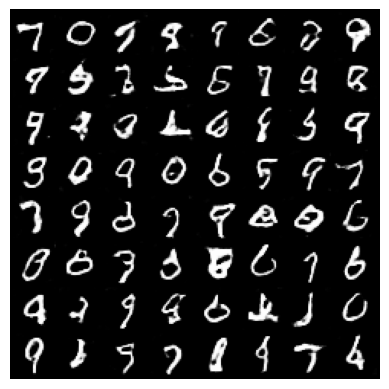

Images displayed after epoch 10.
Epoch [11/50], Batch [100/938], D_real: 0.8114, D_fake: 0.0635, Loss_D: 0.3331, Loss_G: 3.4928
Epoch [11/50], Batch [200/938], D_real: 0.9684, D_fake: 0.1872, Loss_D: 0.2773, Loss_G: 3.1356
Epoch [11/50], Batch [300/938], D_real: 0.9714, D_fake: 0.2915, Loss_D: 0.4222, Loss_G: 3.0003
Epoch [11/50], Batch [400/938], D_real: 0.8266, D_fake: 0.0536, Loss_D: 0.3048, Loss_G: 3.6172
Epoch [11/50], Batch [500/938], D_real: 0.9240, D_fake: 0.1072, Loss_D: 0.2211, Loss_G: 2.7481
Epoch [11/50], Batch [600/938], D_real: 0.9381, D_fake: 0.1576, Loss_D: 0.2605, Loss_G: 2.9050
Epoch [11/50], Batch [700/938], D_real: 0.9641, D_fake: 0.1504, Loss_D: 0.2281, Loss_G: 2.5777
Epoch [11/50], Batch [800/938], D_real: 0.9798, D_fake: 0.3385, Loss_D: 0.5239, Loss_G: 2.5392
Epoch [11/50], Batch [900/938], D_real: 0.8663, D_fake: 0.0587, Loss_D: 0.2307, Loss_G: 3.5863
Epoch [12/50], Batch [100/938], D_real: 0.9692, D_fake: 0.0456, Loss_D: 0.0808, Loss_G: 4.6784
Epoch [12/50], Ba

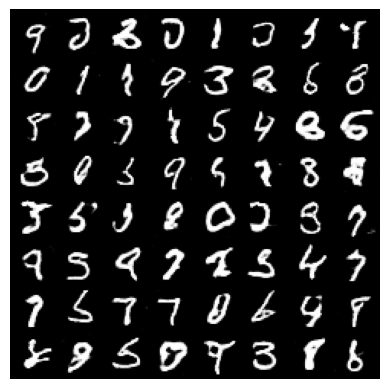

Images displayed after epoch 20.
Epoch [21/50], Batch [100/938], D_real: 0.8825, D_fake: 0.1565, Loss_D: 0.3885, Loss_G: 3.0873
Epoch [21/50], Batch [200/938], D_real: 0.9356, D_fake: 0.1806, Loss_D: 0.3034, Loss_G: 2.1351
Epoch [21/50], Batch [300/938], D_real: 0.7707, D_fake: 0.0514, Loss_D: 0.3771, Loss_G: 3.7132
Epoch [21/50], Batch [400/938], D_real: 0.7533, D_fake: 0.1456, Loss_D: 0.5528, Loss_G: 2.1191
Epoch [21/50], Batch [500/938], D_real: 0.7436, D_fake: 0.0224, Loss_D: 0.3935, Loss_G: 3.1614
Epoch [21/50], Batch [600/938], D_real: 0.9184, D_fake: 0.1761, Loss_D: 0.3189, Loss_G: 3.3773
Epoch [21/50], Batch [700/938], D_real: 0.8872, D_fake: 0.2223, Loss_D: 0.4348, Loss_G: 1.7122
Epoch [21/50], Batch [800/938], D_real: 0.5882, D_fake: 0.0577, Loss_D: 0.7995, Loss_G: 2.6537
Epoch [21/50], Batch [900/938], D_real: 0.7070, D_fake: 0.1223, Loss_D: 0.6030, Loss_G: 3.7403
Epoch [22/50], Batch [100/938], D_real: 0.8415, D_fake: 0.1620, Loss_D: 0.4165, Loss_G: 2.9392
Epoch [22/50], Ba

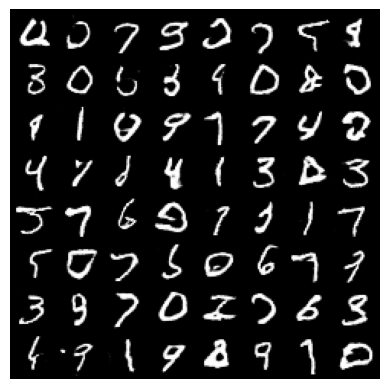

Images displayed after epoch 30.
Epoch [31/50], Batch [100/938], D_real: 0.8814, D_fake: 0.1222, Loss_D: 0.2954, Loss_G: 2.0387
Epoch [31/50], Batch [200/938], D_real: 0.8190, D_fake: 0.0304, Loss_D: 0.2740, Loss_G: 4.4971
Epoch [31/50], Batch [300/938], D_real: 0.7874, D_fake: 0.0440, Loss_D: 0.3538, Loss_G: 3.4529
Epoch [31/50], Batch [400/938], D_real: 0.8052, D_fake: 0.0806, Loss_D: 0.3615, Loss_G: 3.9735
Epoch [31/50], Batch [500/938], D_real: 0.8356, D_fake: 0.1943, Loss_D: 0.5041, Loss_G: 3.5364
Epoch [31/50], Batch [600/938], D_real: 0.9693, D_fake: 0.2689, Loss_D: 0.4307, Loss_G: 1.4927
Epoch [31/50], Batch [700/938], D_real: 0.9417, D_fake: 0.3143, Loss_D: 0.6015, Loss_G: 3.6757
Epoch [31/50], Batch [800/938], D_real: 0.9880, D_fake: 0.5584, Loss_D: 1.0883, Loss_G: 1.4412
Epoch [31/50], Batch [900/938], D_real: 0.8530, D_fake: 0.1422, Loss_D: 0.3471, Loss_G: 2.1109
Epoch [32/50], Batch [100/938], D_real: 0.9530, D_fake: 0.1383, Loss_D: 0.2290, Loss_G: 2.5785
Epoch [32/50], Ba

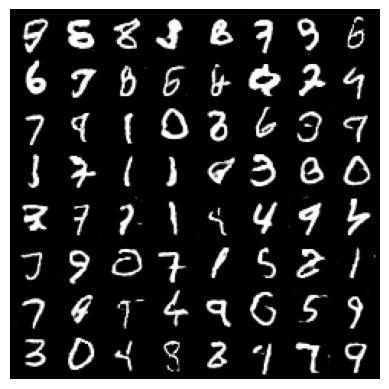

Images displayed after epoch 40.
Epoch [41/50], Batch [100/938], D_real: 0.9750, D_fake: 0.3784, Loss_D: 0.6783, Loss_G: 1.2122
Epoch [41/50], Batch [200/938], D_real: 0.8535, D_fake: 0.0710, Loss_D: 0.2757, Loss_G: 2.7207
Epoch [41/50], Batch [300/938], D_real: 0.8475, D_fake: 0.0899, Loss_D: 0.2919, Loss_G: 3.1896
Epoch [41/50], Batch [400/938], D_real: 0.7179, D_fake: 0.0380, Loss_D: 0.4288, Loss_G: 4.4534
Epoch [41/50], Batch [500/938], D_real: 0.7773, D_fake: 0.1237, Loss_D: 0.4910, Loss_G: 3.0960
Epoch [41/50], Batch [600/938], D_real: 0.9249, D_fake: 0.1875, Loss_D: 0.3381, Loss_G: 2.7084
Epoch [41/50], Batch [700/938], D_real: 0.8941, D_fake: 0.0871, Loss_D: 0.2394, Loss_G: 3.4049
Epoch [41/50], Batch [800/938], D_real: 0.6276, D_fake: 0.0262, Loss_D: 0.6712, Loss_G: 3.7407
Epoch [41/50], Batch [900/938], D_real: 0.8687, D_fake: 0.0883, Loss_D: 0.2800, Loss_G: 3.4273
Epoch [42/50], Batch [100/938], D_real: 0.6310, D_fake: 0.0462, Loss_D: 0.6235, Loss_G: 2.7012
Epoch [42/50], Ba

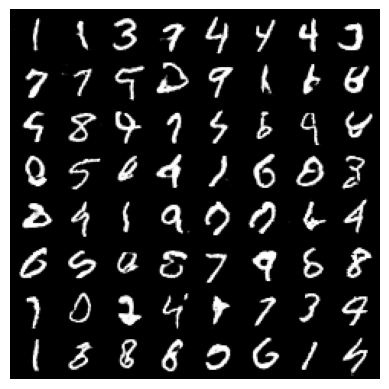

Images displayed after epoch 50.


In [ ]:
# Training loop
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(data_loader):
        real_images = real_images.cuda()
        batch_size = real_images.size(0)

        # Train discriminator with real images
        optimizer_d.zero_grad()
        label_real = torch.ones(batch_size, 1).cuda()
        output_real = discriminator(real_images).view(-1, 1)
        loss_real = criterion(output_real, label_real)
        loss_real.backward()

        # Train discriminator with fake images
        noise = torch.randn(batch_size, latent_dim, 1, 1).cuda()
        fake_images = generator(noise)
        label_fake = torch.zeros(batch_size, 1).cuda()
        output_fake = discriminator(fake_images.detach()).view(-1, 1)
        loss_fake = criterion(output_fake, label_fake)
        loss_fake.backward()
        optimizer_d.step()

        # Train generator
        optimizer_g.zero_grad()
        output = discriminator(fake_images).view(-1, 1)
        loss_g = criterion(output, label_real)
        loss_g.backward()
        optimizer_g.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(data_loader)}], '
                  f'D_real: {output_real.mean():.4f}, D_fake: {output_fake.mean():.4f}, '
                  f'Loss_D: {loss_real.item() + loss_fake.item():.4f}, Loss_G: {loss_g.item():.4f}')

    # Generate and display images every 10 epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            fake_samples = generator(torch.randn(64, latent_dim, 1, 1).cuda())
            fake_samples = fake_samples.cpu()
            fake_grid = torchvision.utils.make_grid(fake_samples, padding=2, normalize=True)

            # Display the image
            plt.imshow(np.transpose(fake_grid, (1, 2, 0)))
            plt.axis('off')
            plt.show()
        print(f"Images displayed after epoch {epoch + 1}.")


In [ ]:
# Save the trained generator model
torch.save(generator.state_dict(), 'generator.pth')

Results and Discussion:

After training the GAN for a fixed number of epochs ( 50 epochs):

Generated Images:

The GAN successfully generated images resembling handwritten digits.

Some images may be blurry or distorted due to underfitting or mode collapse.

Evaluation:

Visual inspection of generated images shows the quality and diversity of samples.



References:

[1] https://in.mathworks.com/help/deeplearning/ug/train-generative-adversarial-network.html

[2] https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

[3]https://medium.com/@simple.schwarz/how-to-build-a-gan-for-generating-mnist-digits-in-pytorch-b9bf71269da8